In [1]:
#from time import time
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import pandas as pd

from my_fun import read_brain_feature_fc
from my_fun import run_model
from my_fun import summary_result
from my_fun import plot_result_mergecv

print(sklearn.__version__)
#brain_feature_list, subject_id = read_brain_feature()
brain_feature_list, subject_id = read_brain_feature_fc()

# read subject_info:
pnc_subject_info = pd.read_csv("data/pnc_subject_info.csv", delimiter = ",")
print(pnc_subject_info.shape)

subject_info_merge = subject_id.merge(pnc_subject_info, how = "left", left_on = "names", right_on = "SUBJID")
print(subject_info_merge.shape)

# head_motion_subjects = pd.read_csv("data/head_motion_subject_delete.txt", delimiter = "\t", header = None)
# #print(head_motion_subjects)
# head_motion_sublist = head_motion_subjects.iloc[:,0].tolist()
# subject_info_merge = subject_info_merge[~subject_info_merge.SUBJID.isin(head_motion_sublist)]

# remove samples with Med_rating higher than 1:
subject_info_merge["Med_Rating"] = subject_info_merge["Med_Rating"].apply(pd.to_numeric, errors='coerce')
subject_info_merge = subject_info_merge.loc[subject_info_merge["Med_Rating"]<2,:]

subject_info_merge['Sex'] = subject_info_merge['Sex'].apply({'F':0, 'M':1}.get)
      
print(subject_info_merge.head())
subject_info_columns = ['SUBJID', 'Sex', 'age_at_cnb']


0.19.1
cat_vbm:
(856, 143)
label fa:
(856, 50)
tract fa:
(856, 20)
tract md:
(856, 20)
label md:
(856, 50)
(8719, 6)
(856, 7)
          names        SUBJID        Race  Sex  Med_birth_year  Med_Rating  \
0  600009963128  6.000100e+11          EA    0          2001.0         1.0   
1  600018902293  6.000189e+11          EA    0          1996.0         1.0   
3  600038720566  6.000387e+11      EA, AA    0          1999.0         1.0   
4  600039015048  6.000390e+11  EA, AA, HI    1          1999.0         1.0   
5  600039665619  6.000397e+11          EA    1          2001.0         1.0   

   age_at_cnb  
0         9.0  
1        15.0  
3        11.0  
4        11.0  
5         9.0  


In [2]:
print("participants:")
print("number of subjects: %d" % subject_info_merge.shape[0])
print("meam  and std of age: %.2f %.2f" % (subject_info_merge["age_at_cnb"].mean(),\
                                           subject_info_merge["age_at_cnb"].std()))
print("range of age: %d - %d" % (subject_info_merge["age_at_cnb"].max(),\
                                 subject_info_merge["age_at_cnb"].min()))

print("number of females: %d" % subject_info_merge.loc[subject_info_merge['Sex']==0,:].shape[0])
print("number of males: %d" % subject_info_merge.loc[subject_info_merge['Sex']==1,:].shape[0])



participants:
number of subjects: 605
meam  and std of age: 14.20 3.29
range of age: 21 - 8
number of females: 331
number of males: 274


In [3]:
from sklearn.model_selection import KFold
# from sklearn.model_selection import StratifiedKFold

subject_info_hc = subject_info_merge

# tune model in 3-fold CV:
# n fold CV on hc data:
nfold = 10
seed = 111
kf = KFold(n_splits=nfold, shuffle = True, random_state=seed)
# kf = StratifiedKFold(n_splits=nfold, shuffle = True, random_state=seed)


In [4]:
# fc = brain_feature_list[0][0]
# print(sum(np.isnan(fc).any(axis = 1)))
# print(sum(np.isnan(fc).any(axis = 0)))

# print(sum(np.isnan(fc).all(axis = 1)))
# print(sum(np.isnan(fc).all(axis = 0)))
# fc[np.isnan(fc)] = 0

In [5]:
###############################################ridge:#########################################
from sklearn.linear_model import RidgeCV
import numpy as np

# ridge regression:
alpha = np.power(10, np.linspace(-3, 3, num = 10))
# print(alpha)
ridge_cv = RidgeCV(alphas=alpha, cv = nfold)

result_table_ridge, scatter_data_ridge = run_model(ridge_cv, subject_info_hc, brain_feature_list, 
                                                   kf, fit_method = 0)


processing on: %s -------------------------- FC
run_model on CV: 1
run_model on CV: 2
run_model on CV: 3
run_model on CV: 4
run_model on CV: 5
run_model on CV: 6
run_model on CV: 7
run_model on CV: 8
run_model on CV: 9
run_model on CV: 10
processing on: %s -------------------------- GMV&rsfMRIfc
run_model on CV: 1
run_model on CV: 2
run_model on CV: 3
run_model on CV: 4
run_model on CV: 5
run_model on CV: 6
run_model on CV: 7
run_model on CV: 8
run_model on CV: 9
run_model on CV: 10
processing on: %s -------------------------- DTI&rsfMRIfc
run_model on CV: 1
run_model on CV: 2
run_model on CV: 3
run_model on CV: 4
run_model on CV: 5
run_model on CV: 6
run_model on CV: 7
run_model on CV: 8
run_model on CV: 9
run_model on CV: 10
processing on: %s -------------------------- Multi-modalfc
run_model on CV: 1
run_model on CV: 2
run_model on CV: 3
run_model on CV: 4
run_model on CV: 5
run_model on CV: 6
run_model on CV: 7
run_model on CV: 8
run_model on CV: 9
run_model on CV: 10


In [6]:
result_table_ridge.to_csv("result/result_table_ridge_fc.csv", sep = ",")
scatter_data_ridge.to_csv("result/scatter_data_ridge_fc.csv", sep = ",", index = False)


In [7]:
import pandas as pd
result_table = pd.read_csv("result/result_table_ridge_fc.csv", sep = ",", header = [0,1], index_col = 0)
# result_table.columns = col_result_table
print(result_table)
result_summary_ridge, result_plot_ridge = summary_result(result_table)

              Pearson r                                                    \
                  boot1     boot2     boot3     boot4     boot5     boot6   
FC             0.744413  0.686336  0.580145  0.723224  0.746505  0.753986   
GMV&rsfMRIfc   0.760731  0.707400  0.629266  0.762246  0.762251  0.776777   
DTI&rsfMRIfc   0.789702  0.729228  0.611056  0.758953  0.775625  0.800647   
Multi-modalfc  0.803600  0.746642  0.661246  0.789615  0.793612  0.817649   

                                                         ...         rmse  \
                  boot7     boot8     boot9    boot10    ...        boot1   
FC             0.725711  0.768103  0.789372  0.614966    ...     2.047869   
GMV&rsfMRIfc   0.761417  0.809036  0.819267  0.653129    ...     1.975763   
DTI&rsfMRIfc   0.743292  0.796472  0.824738  0.691858    ...     1.903694   
Multi-modalfc  0.775918  0.831969  0.848864  0.726374    ...     1.829117   

                                                                          

<Figure size 1080x1080 with 0 Axes>

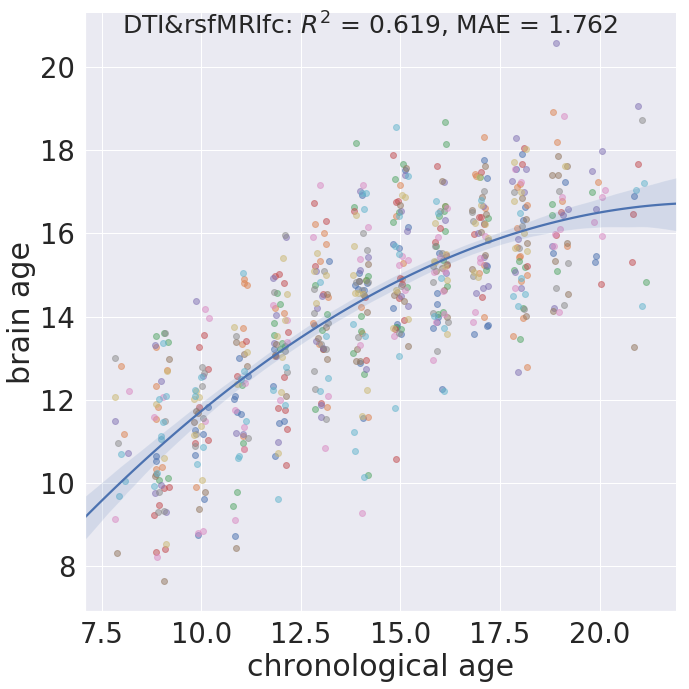

<Figure size 1080x1080 with 0 Axes>

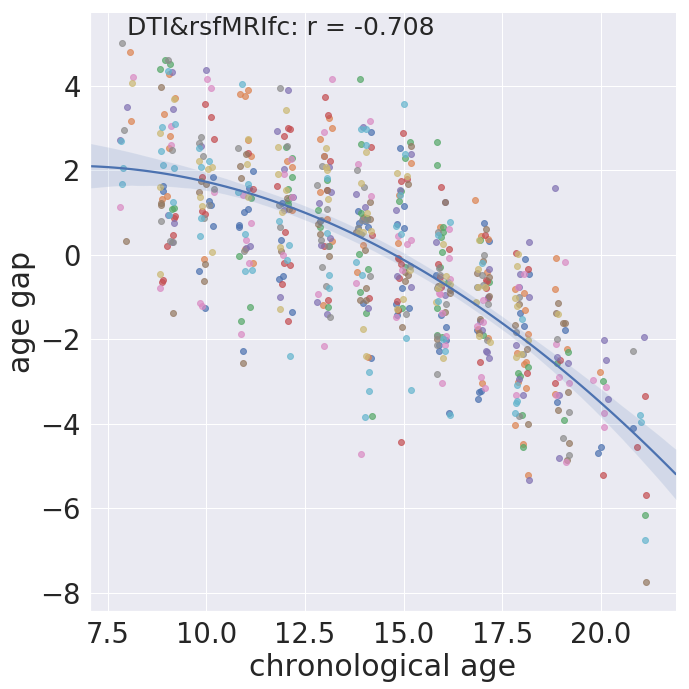

<Figure size 1080x1080 with 0 Axes>

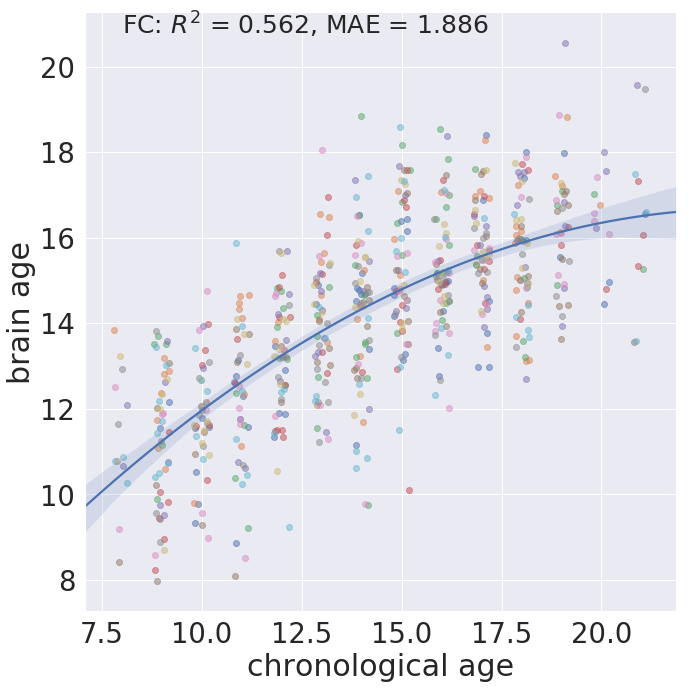

<Figure size 1080x1080 with 0 Axes>

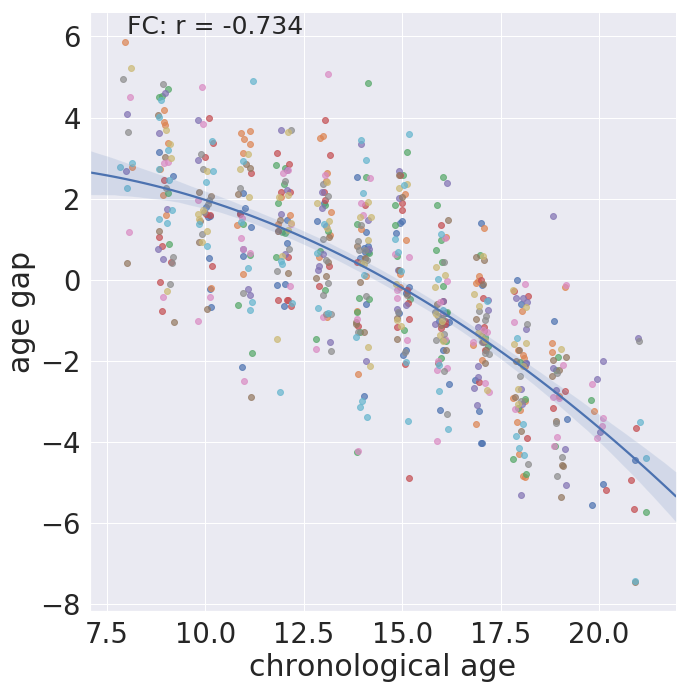

<Figure size 1080x1080 with 0 Axes>

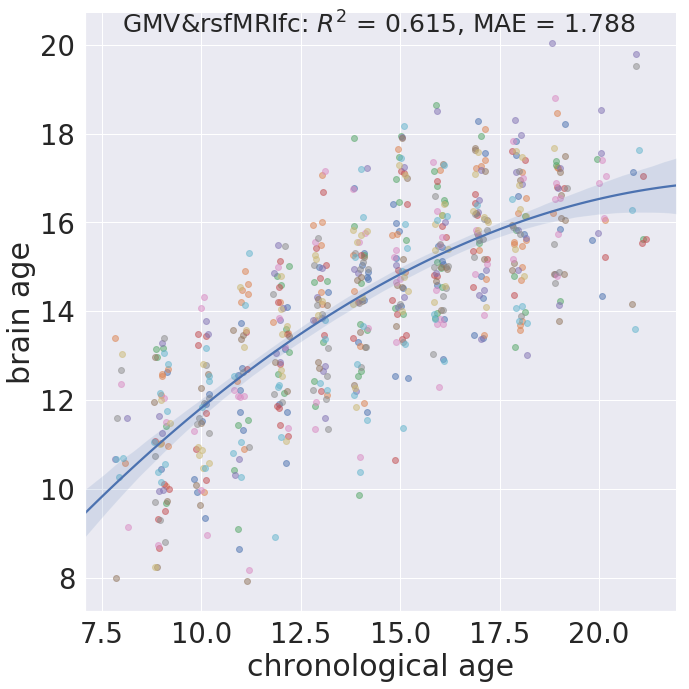

<Figure size 1080x1080 with 0 Axes>

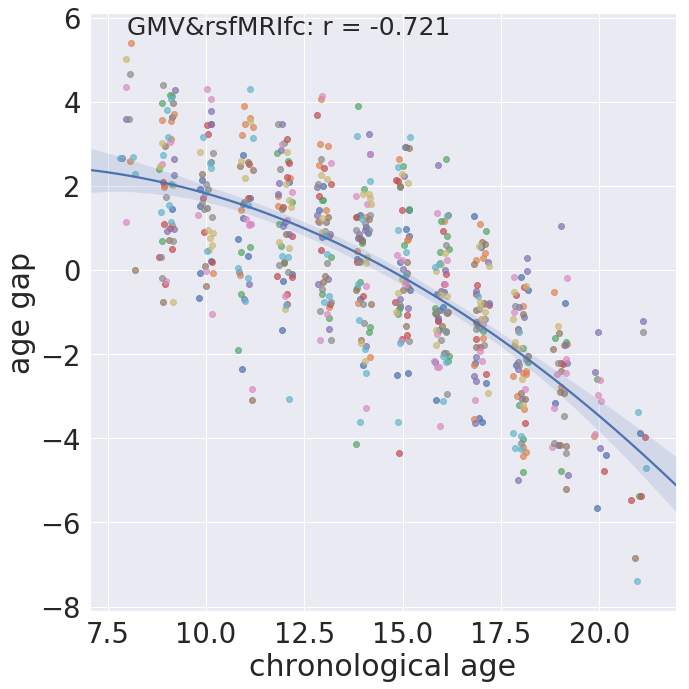

<Figure size 1080x1080 with 0 Axes>

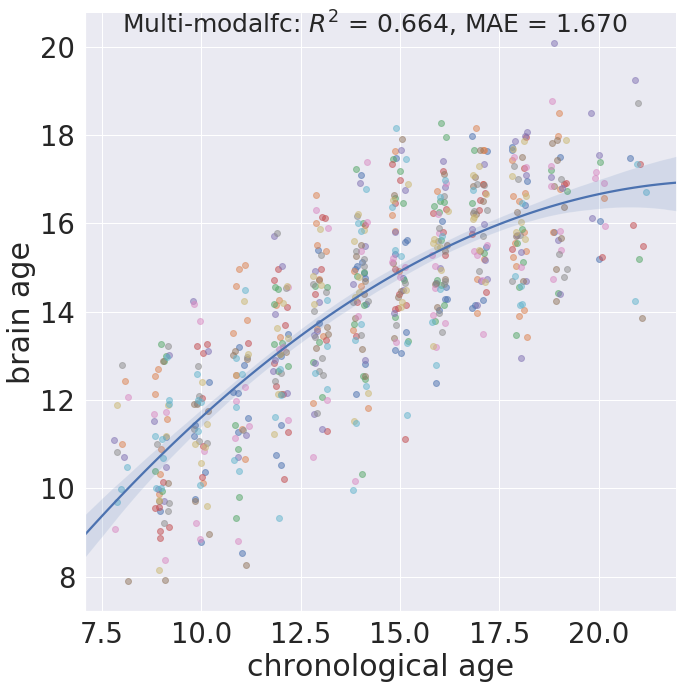

<Figure size 1080x1080 with 0 Axes>

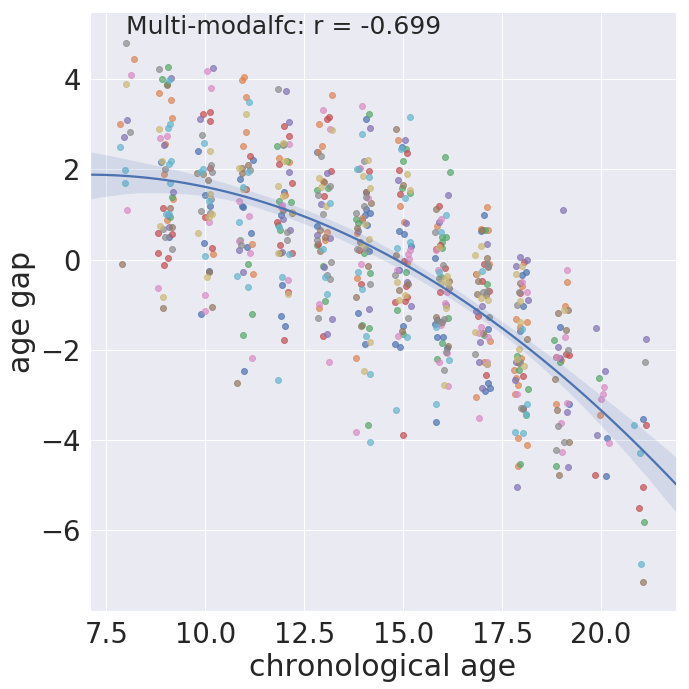

In [19]:
# plot ridge regression results:

scatter_data = pd.read_csv("result/scatter_data_ridge_fc.csv", sep = ",", header = 0, )
plot_result_mergecv(result_summary_ridge, scatter_data)

In [9]:
############################################### SVR: #########################################
from sklearn.svm import SVR
import numpy as np

C = np.power(10, np.linspace(-1,2, num = 20))
#epsilon=np.linspace(.001, 1, num = 20)
epsilon=.01

param_grid_svr = dict(C = C, epsilon = epsilon)
# linear model takes very long time to run.
#grid_svr = GridSearchCV(estimator=SVR(kernel='linear'), param_grid=param_grid_svr, n_jobs=3, refit = True)
# use default kernel rbf:
grid_svr = GridSearchCV(estimator=SVR(), param_grid=param_grid_svr, n_jobs=3, refit = True)

result_table_svr, scatter_data_svr = run_model(grid_svr, subject_info_hc, brain_feature_list, kf, fit_method = 1)



processing on: %s -------------------------- FC
run_model on CV: 1
Best: 0.342037 using {'C': 16.23776739188721, 'epsilon': 0.001}
run_model on CV: 2
Best: 0.342322 using {'C': 7.847599703514611, 'epsilon': 0.001}
run_model on CV: 3
Best: 0.347981 using {'C': 7.847599703514611, 'epsilon': 0.001}
run_model on CV: 4
Best: 0.333014 using {'C': 16.23776739188721, 'epsilon': 0.001}
run_model on CV: 5
Best: 0.346536 using {'C': 16.23776739188721, 'epsilon': 0.001}
run_model on CV: 6
Best: 0.323110 using {'C': 7.847599703514611, 'epsilon': 0.001}
run_model on CV: 7
Best: 0.349853 using {'C': 16.23776739188721, 'epsilon': 0.001}
run_model on CV: 8
Best: 0.324608 using {'C': 7.847599703514611, 'epsilon': 0.001}
run_model on CV: 9
Best: 0.347582 using {'C': 7.847599703514611, 'epsilon': 0.001}
run_model on CV: 10
Best: 0.339056 using {'C': 11.288378916846883, 'epsilon': 0.001}
processing on: %s -------------------------- GMV&rsfMRIfc
run_model on CV: 1
Best: 0.367202 using {'C': 16.2377673918872

In [10]:
result_table_svr.to_csv("result/result_table_svr_fc.csv", sep = ",")
scatter_data_svr.to_csv("result/scatter_data_svr_fc.csv", sep = ",", index = False)

In [11]:
import pandas as pd

result_table = pd.read_csv("result/result_table_svr_fc.csv", sep = ",", header = [0,1], index_col = 0)
result_summary_svr, result_plot_svr = summary_result(result_table)

#print(plot_data)

<Figure size 1080x1080 with 0 Axes>

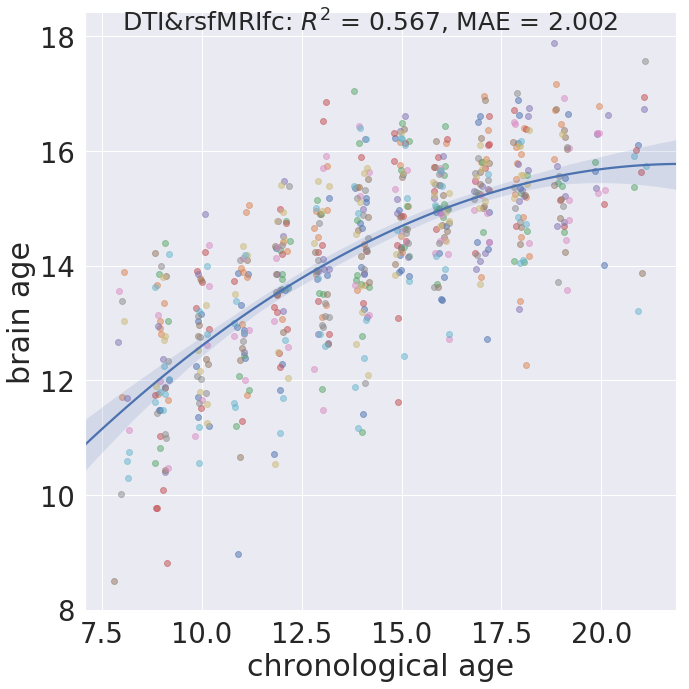

<Figure size 1080x1080 with 0 Axes>

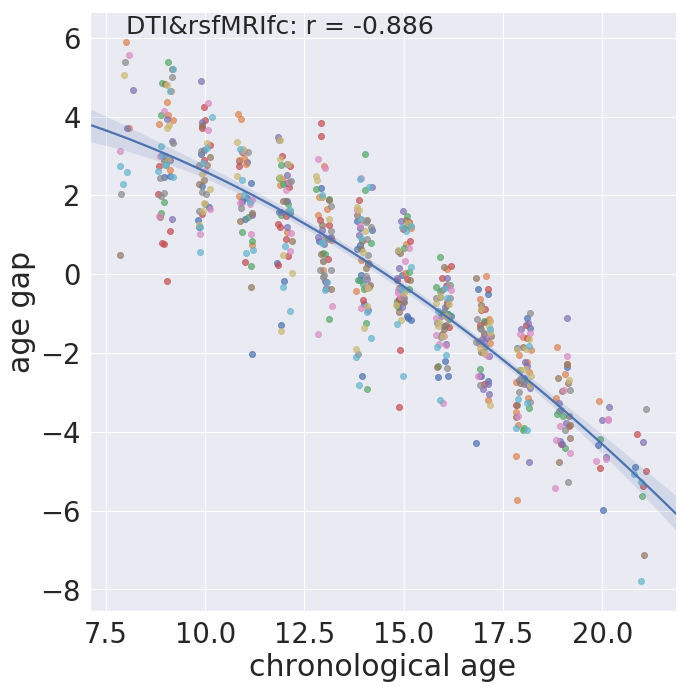

<Figure size 1080x1080 with 0 Axes>

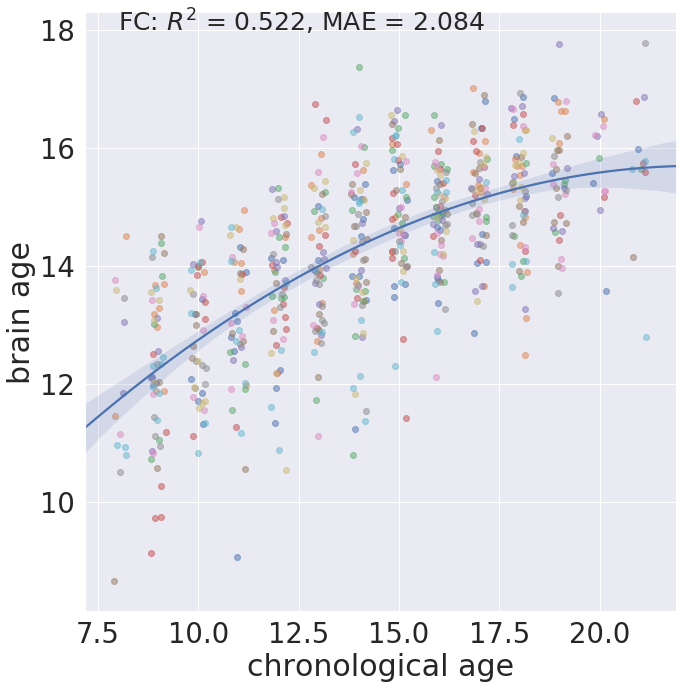

<Figure size 1080x1080 with 0 Axes>

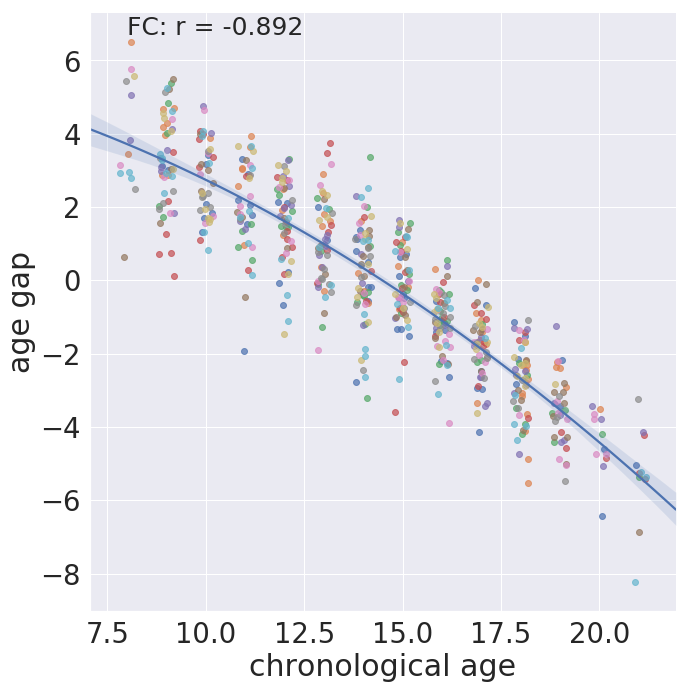

<Figure size 1080x1080 with 0 Axes>

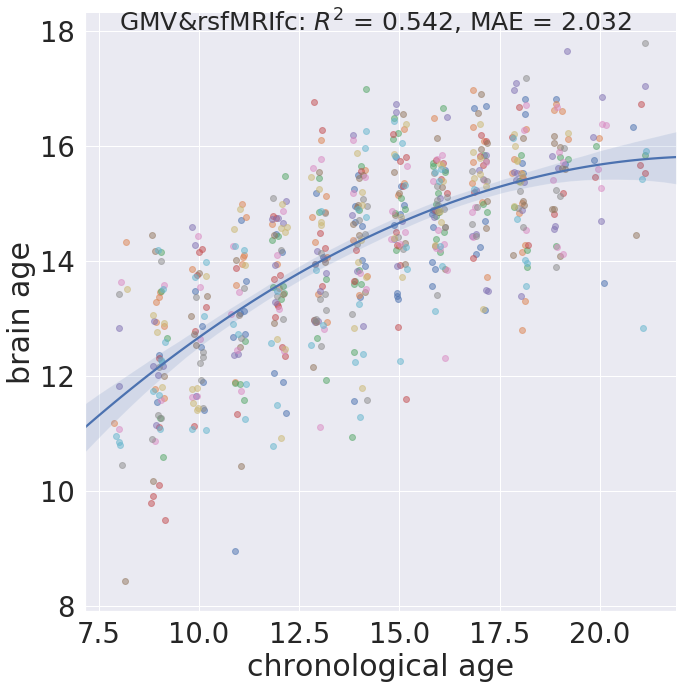

<Figure size 1080x1080 with 0 Axes>

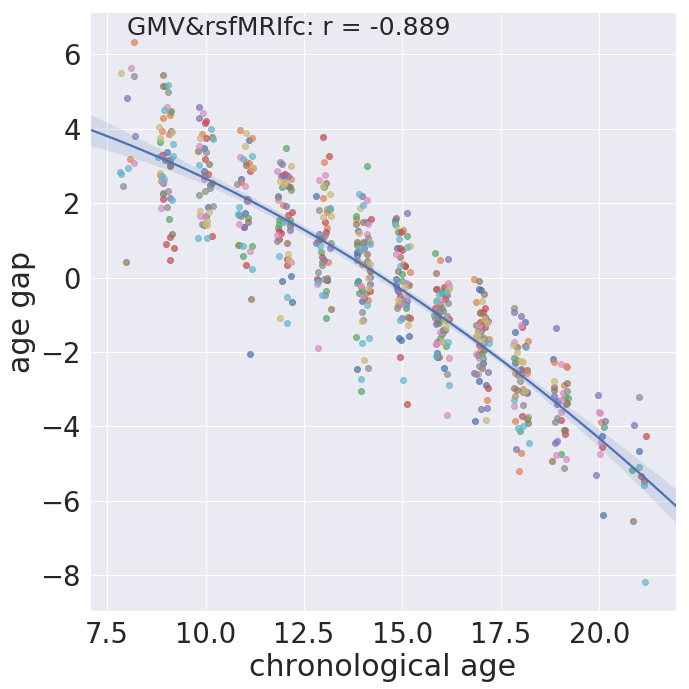

<Figure size 1080x1080 with 0 Axes>

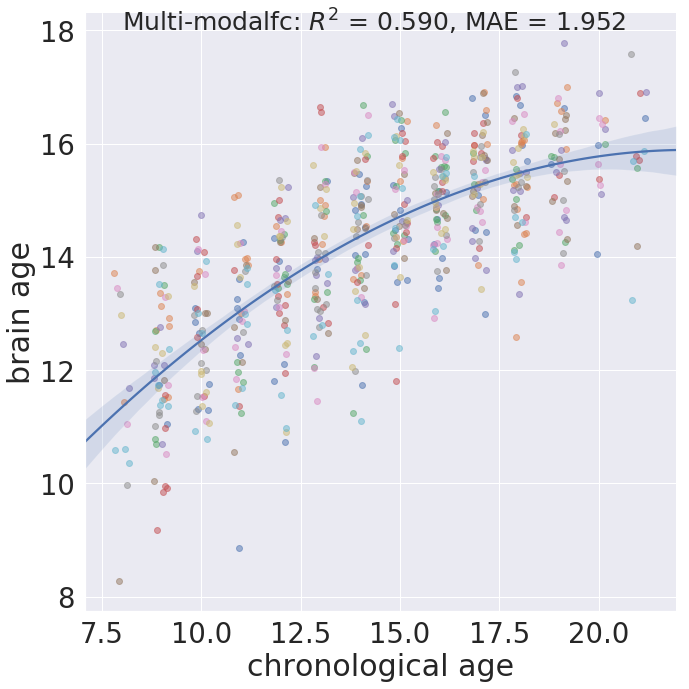

<Figure size 1080x1080 with 0 Axes>

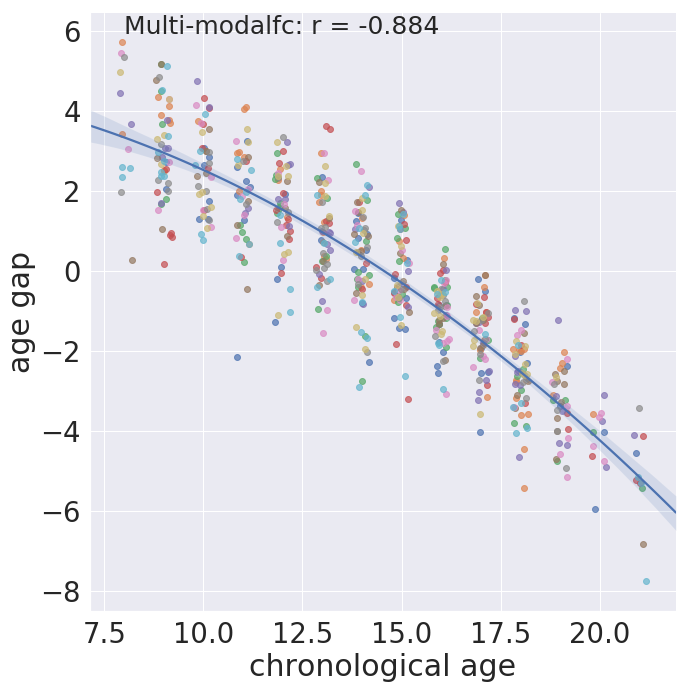

In [12]:
# plot svr regression results:

scatter_data = pd.read_csv("result/scatter_data_svr_fc.csv", sep = ",", header = 0, )
plot_result_mergecv(result_summary_svr, scatter_data)

In [13]:
############################################### GPR: #########################################
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from sklearn.gaussian_process.kernels import ConstantKernel as CK

# gpr_kernel = 1.0 * RBF(length_scale=10, length_scale_bounds=(1e-2, 1e3)) \
#                     + WhiteKernel(noise_level=1, noise_level_bounds=(1e-10, 1e+1))

# gpr_kernel2 = 1.0 * RBF(length_scale=100, length_scale_bounds=(1e-2, 1e3)) \
#                     + WhiteKernel(noise_level=1, noise_level_bounds=(1e-10, 1e+1))

# gpr_kernel3 = 1.0 * RBF(length_scale=1000, length_scale_bounds=(1e-2, 1e3)) \
#                     + WhiteKernel(noise_level=1, noise_level_bounds=(1e-10, 1e+1))

gpr_kernel4 = CK(2.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2)) \
                    + WhiteKernel(noise_level=1, noise_level_bounds=(1e-10, 1e+1))


# gpr_kernel4 = 1.0 * RBF(length_scale=100, length_scale_bounds=(1e-2, 1e3))

gpr_alpha = np.power(10, np.linspace(-2, 2, num = 10))

#gpr_alpha = np.linspace(0,.1, num = 3)

#param_grid_gpr = dict(alpha = gpr_alpha, kernel=[gpr_kernel, gpr_kernel2, gpr_kernel3, gpr_kernel4])
param_grid_gpr = dict(alpha = gpr_alpha, kernel=[gpr_kernel4])

grid_gpr = GridSearchCV(estimator=GaussianProcessRegressor(), \
                                param_grid=param_grid_gpr, n_jobs=3, refit = True)

result_table_gpr, scatter_data_gpr = run_model(grid_gpr, subject_info_hc, brain_feature_list, kf, fit_method = 1)

processing on: %s -------------------------- FC
run_model on CV: 1
Best: -18.605989 using {'alpha': 0.01, 'kernel': 1.41**2 * RBF(length_scale=10) + WhiteKernel(noise_level=1)}
run_model on CV: 2
Best: -19.243310 using {'alpha': 0.01, 'kernel': 1.41**2 * RBF(length_scale=10) + WhiteKernel(noise_level=1)}
run_model on CV: 3
Best: -18.421615 using {'alpha': 0.01, 'kernel': 1.41**2 * RBF(length_scale=10) + WhiteKernel(noise_level=1)}
run_model on CV: 4
Best: -19.148688 using {'alpha': 0.01, 'kernel': 1.41**2 * RBF(length_scale=10) + WhiteKernel(noise_level=1)}
run_model on CV: 5
Best: -19.071198 using {'alpha': 0.01, 'kernel': 1.41**2 * RBF(length_scale=10) + WhiteKernel(noise_level=1)}
run_model on CV: 6
Best: -18.945455 using {'alpha': 0.01, 'kernel': 1.41**2 * RBF(length_scale=10) + WhiteKernel(noise_level=1)}
run_model on CV: 7
Best: -19.045821 using {'alpha': 0.01, 'kernel': 1.41**2 * RBF(length_scale=10) + WhiteKernel(noise_level=1)}
run_model on CV: 8
Best: -19.017386 using {'alpha

In [14]:
result_table_gpr.to_csv("result/result_table_gpr_fc.csv", sep = ",")
scatter_data_gpr.to_csv("result/scatter_data_gpr_fc.csv", sep = ",", index = False)

In [17]:
import pandas as pd

result_table = pd.read_csv("result/result_table_gpr_fc.csv", sep = ",", header = [0,1], index_col = 0)
result_summary_gpr, result_plot_gpr = summary_result(result_table)

#print(plot_data)

<Figure size 1080x1080 with 0 Axes>

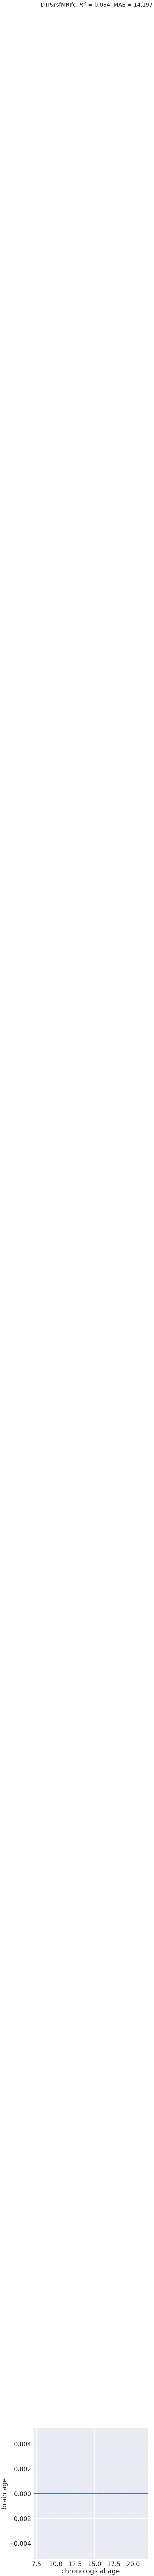

<Figure size 1080x1080 with 0 Axes>

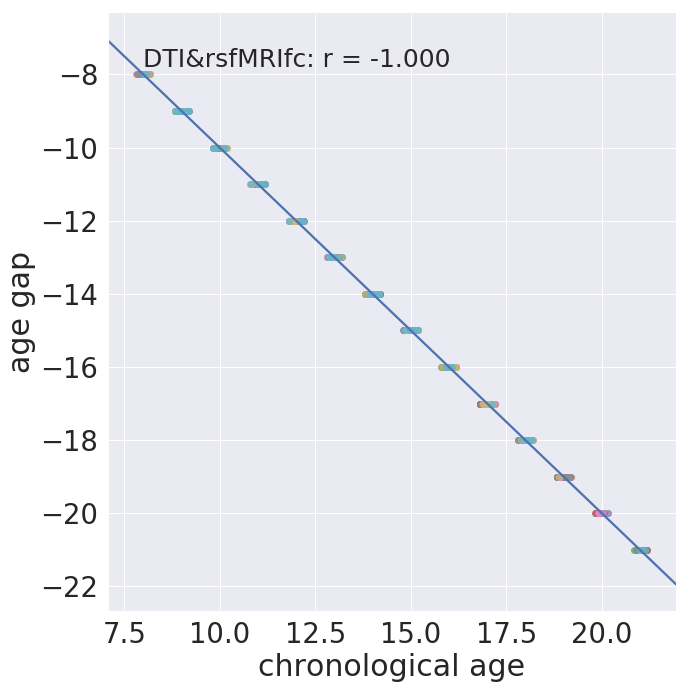

<Figure size 1080x1080 with 0 Axes>

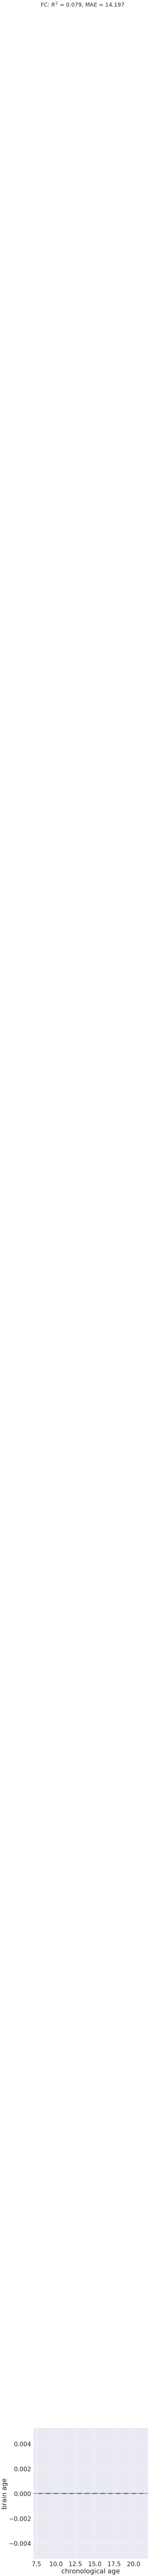

<Figure size 1080x1080 with 0 Axes>

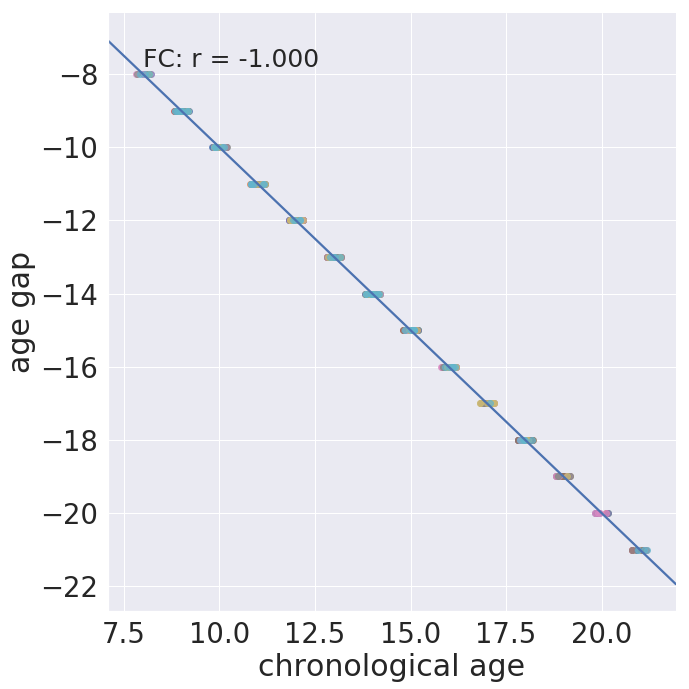

<Figure size 1080x1080 with 0 Axes>

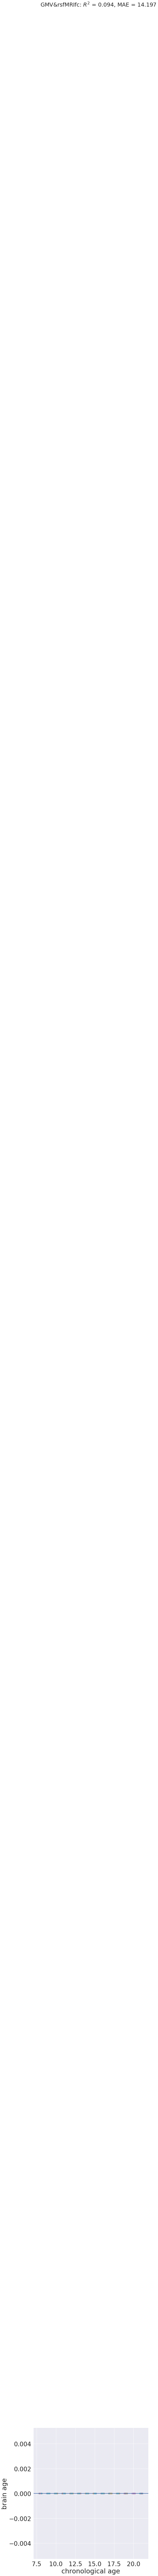

<Figure size 1080x1080 with 0 Axes>

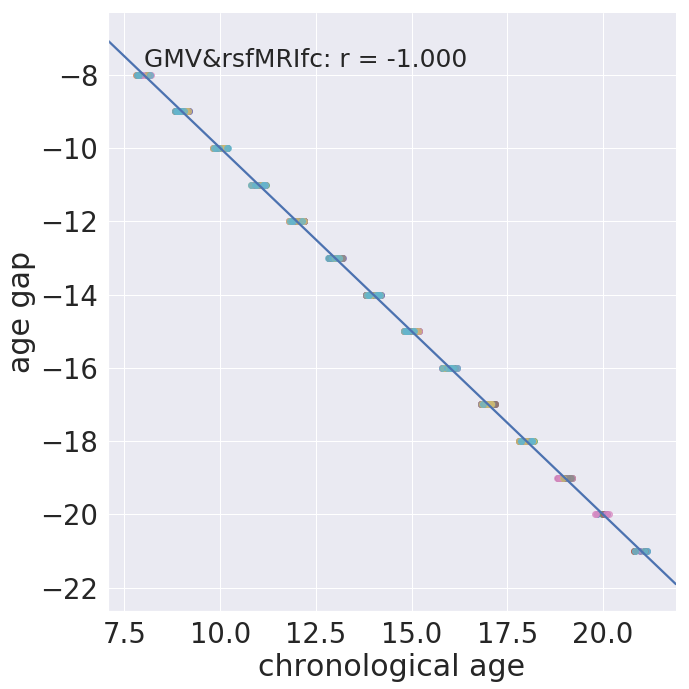

<Figure size 1080x1080 with 0 Axes>

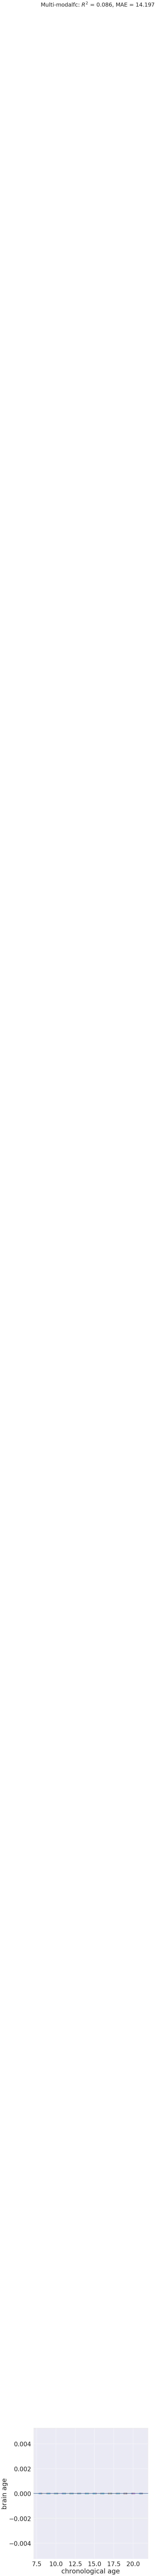

<Figure size 1080x1080 with 0 Axes>

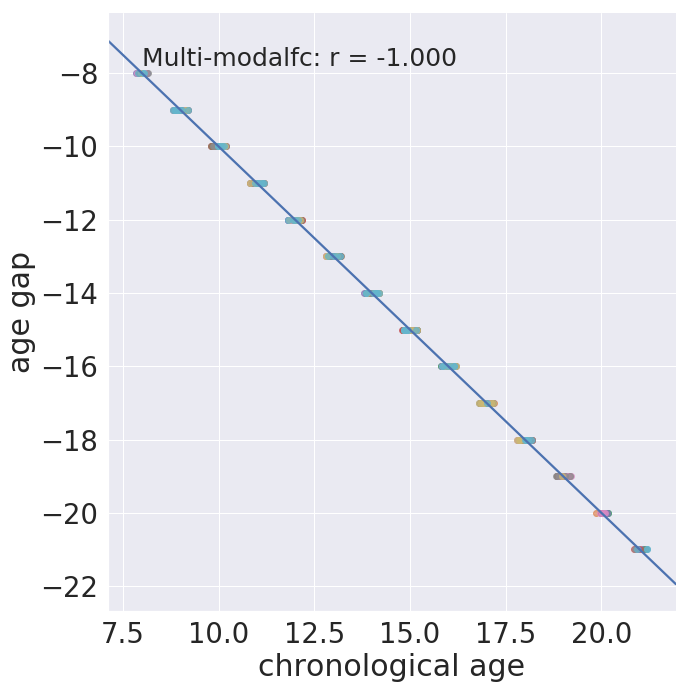

In [18]:
# plot gpr regression results:
from my_fun import plot_result_mergecv

# to make the plot show up if codes are called in a function.
%matplotlib inline

scatter_data = pd.read_csv("result/scatter_data_gpr_fc.csv", sep = ",", header = 0, )
plot_result_mergecv(result_summary_gpr, scatter_data)
        